### Assignment 1

Submission should be in a Jupyter note book (.ipynb)

1. Implement a function that converts a ```fixed<w, b>``` representation to a real number. Use two's compement for negative numbers. The function signature is 

   ```python
   def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
   # w: width of the binary representation
   # b: binary point
   ```
   Test the following inputs
   ```python
   fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])
   ```
   ```python
   fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])
   ```
   ```python
   fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])
   ```
   


In [1]:
def fromFixedPoint(w: int, b: int, bits: [int]) -> float:
    integer_part = 0
    fractional_part = 0.0

    if bits[0] == 0:
        # Calculate the integer part
        for i in range(w - b):
            integer_part = (integer_part * 2) + bits[i]

        # Calculate the fractional part
        for i in range(w - b, w):
            fractional_part = (fractional_part * 2) + bits[i]

        # Combine the integer and fractional parts to get the real value
        real_value = integer_part + fractional_part / (2 ** b)

        return real_value
    else:
        for i in range(1):
            integer_part = (integer_part * 2) - bits[i]

        for i in range(1, w - b):
            integer_part = (integer_part * 2) + bits[i]

        for i in range(w - b, w):
            fractional_part = (fractional_part * 2) + bits[i]

        # Combine the integer and fractional parts to get the real value for negative numbers
        real_value = (integer_part + fractional_part / (2 ** b))

        return real_value

In [2]:
print(fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]))
print(fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1]))
print(fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1]))

44.75
-13.28125
-21.25


2. Calculate the price of the following questions step by step using two step Cox Rox Rubinstein (CRR) Binomial tree

    a. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    b. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    c. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    d. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    What is the value of the portfolio that is long (a) and short (b)? How about the portfolio that long (c) and short (d)?
    

## (a) and (b)

\begin{equation*}
b = e^{rT + \sigma^2 T} + e^{-rT} = e^{0.03 \cdot 0.5 + 0.2^2 \cdot 0.5} + e^{-0.03 \cdot 0.5} = 2.020732
\end{equation*}

\begin{equation*}
u = \frac{b + \sqrt{b^2 - 4}}{2} = \frac{2.042954 + \sqrt{2.042954^2 - 4}}{2} = 1.154723
\end{equation*}

\begin{equation*}
d = \frac{1}{u} = \frac{1}{1.229839} = 0.866008
\end{equation*}

\begin{equation*}
p = \frac{e^{rT} - d}{u - d} = \frac{e^{0.03 \cdot 0.5} - 0.866008}{1.154723 - 0.866008} = 0.516443
\end{equation*}

\begin{equation*}
1 - p = 0.483557
\end{equation*}


At $T=1/2$, 

$S_u = S \cdot u = 100 \cdot 1.154723 = 115.4723$ 

$S_d = S \cdot d = 100 \cdot 0.866008 = 86.6008$ 

At $T=1$, 

$S_uu = S_u \cdot u = 115.4723 \cdot 1.154723 = 133.3386$ 

$S_dd = S_d \cdot d = 86.6008 \cdot 0.866008 = 74.9970$ 

$S_ud = S_ud = S_u \cdot d = 115.4723 \cdot 0.866008 = 100$ 


### a. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$

At $uu$, payoff = max$(133.3386 - 105, 0) = 28.3386$ ,

At $ud$, payoff = max$(100 - 105, 0) = 0$ ,

At $dd$, payoff = max$(74.9970 - 105, 0) = 0$

At $u$, payoff = $28.3386 \times p \times e^{-0.03 \cdot 0.5} = 14.4174$,

At $d$, payoff = $0$

At $T = 0$, payoff = $14.4174 \times p \times e^{-0.03 \cdot 0.5} = 7.3349$

### b. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$


At $uu$, payoff = max$(105 - 133.3386, 0) = 0$ ,

At $ud$, payoff = max$(105 - 100, 0) = 5$ ,

At $dd$, payoff = max$(105 - 74.9970, 0) = 30.003$

At $u$, payoff = $ 5 \times (1-p) \times e^{-0.03 \cdot 0.5} = 2.3818$,

At $d$, payoff = $ [5 \times p + 30.003 \times (1-p)] \times e^{-0.03 \cdot 0.5} = 16.8359$

At $T = 0$, payoff = $ [2.3818 \times p + 16.8359 \times (1-p)] \times e^{-0.03 \cdot 0.5} = 9.2317$

## (c) and (d)

\begin{equation*}
b = e^{rT + \sigma^2 T} + e^{-rT} = e^{0.03 \cdot 0.5 + 0.1^2 \cdot 0.5} + e^{-0.03 \cdot 0.5} = 2.005313
\end{equation*}

\begin{equation*}
u = \frac{b + \sqrt{b^2 - 4}}{2} = \frac{2.042954 + \sqrt{2.042954^2 - 4}}{2} = 1.075597
\end{equation*}

\begin{equation*}
d = \frac{1}{u} = \frac{1}{1.229839} = 0.929716
\end{equation*}

\begin{equation*}
p = \frac{e^{rT} - d}{u - d} = \frac{e^{0.03 \cdot 0.5} - 0.929716}{1.075597 - 0.929716} = 0.585389
\end{equation*}

\begin{equation*}
1 - p = 0.414611
\end{equation*}

At $T=1/2$, 

$S_u = S \cdot u = 100 \cdot 1.075597 = 107.5597$ 

$S_d = S \cdot d = 100 \cdot 0.929716 = 92.9716$ 

At $T=1$, 

$S_uu = S_u \cdot u = 107.5597 \cdot 1.075597 = 115.6909$ 

$S_dd = S_d \cdot d = 92.9716 \cdot 0.929716 = 86.4372$ 

$S_ud = S_ud = S_u \cdot d = 115.6909 \cdot 0.929716 = 100$ 

### c. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$

At $uu$, payoff = max$(115.6909 - 105, 0) = 10.6909$ ,

At $ud$, payoff = max$(100 - 105, 0) = 0$ ,

At $dd$, payoff = max$(86.4372 - 105, 0) = 0$

At $u$, payoff = $10.6909 \times p \times e^{-0.03 \cdot 0.5} = 6.1652$,

At $d$, payoff = $0$

At $T = 0$, payoff = $6.1652 \times p \times e^{-0.03 \cdot 0.5} = 3.5553$

### d. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$

At $uu$, payoff = max$(105 - 115.6909, 0) = 0$ ,

At $ud$, payoff = max$(105 - 100, 0) = 5$ ,

At $dd$, payoff = max$(105 - 86.4372, 0) = 18.5628$

At $u$, payoff = $ 5 \times (1-p) \times e^{-0.03 \cdot 0.5} = 2.0422$,

At $d$, payoff = $ [5 \times p + 18.5628 \times (1-p)] \times e^{-0.03 \cdot 0.5} = 10.4651$

At $T = 0$, payoff = $ [2.0422 \times p + 10.4651 \times (1-p)] \times e^{-0.03 \cdot 0.5} = 5.452$

### long (a) and short (b)
$7.3349 - 9.2317 = -1.8968$

### long (c) and short (d)
$3.5553 - 5.452 = -1.8968$

3. Greeks measure the sensitivity of the price of derivatives to a change in underlying asset’s parameters. They are used for hedging and risk
management. The commonly used greeks are:
    * Delta $\Delta = \frac{\partial V}{\partial S}$: measures the rate of change of the option value with respect to changes in the underlying asset's price.
    * Gamma $\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$: measures the rate of change of delta with respect to changes in the underlying asset's price.
    * Vega: $v = \frac{\partial V}{\partial \sigma}$: measures the rate of change of the option value with respect to changes in the underlying asset's volatility.
    * Theta: $\theta = \frac{\partial V}{\partial t}$: the rate of change in the price of an option with respect to pricing time. Note that we normally use $t$ to represent pricing time, $T$ to represent expiry time, time to expiry in our pricer is $T-t$. In the implementation of the pricers that take time to expiry as an argument, we implicitly set pricing time to 0 (present).
    * Rho: the rate of change in the price of an option in response to a change in the interest rate.
    
  The greeks are normally not known in closed form since numerical pricers are used. They are approximated by finite differences:

  \begin{align}
    & \Delta = \frac{\partial V}{\partial S} \approx \frac{V(S + \Delta S) - V(S-\Delta S)}{2 \Delta S}, ~~~\Delta S = 0.1\% S \\
    & \Gamma = \frac{\partial V^2}{\partial S^2} \approx \frac{V(S + \Delta S) - 2V(S) + V(S-\Delta S)}{\Delta S^2} \\
    & v = \frac{\partial V}{\partial \sigma} \approx \frac{V(S, \sigma +\Delta \sigma) - V(S, \sigma -\Delta \sigma)}{2 \Delta \sigma } ~~~~~~~\Delta \sigma = 0.1\% \\
    & \theta = \frac{\partial V}{\partial t} \approx \frac{V(S, t+\Delta t, T) - V(S, t, T)}{\Delta t} ~~~~\Delta t = 0.004 \\
    & \rho = \frac{\partial V}{\partial r} \approx \frac{V(S, r+\Delta r) - V(S, r - \Delta r)}{2 \Delta r}  ~~~~~\Delta r = 0.0001
  \end{align}

  Implement a Greeks calculater for binomial tree pricer provided below. The signature of the greeks calculator is
      ```python
      def binomialGreeks(S, r, vol, T, strike, greekType) -> float
      ```
  Setting $S = 100, r = 0.03, vol = 0.2, t = 0, T = 1$, plot each greeks as a function of strike from 50 to 150. Play with different binomial models and see if there is any difference.
  
  Note that in practice, the greeks are rescaled with a pre-defined scaler, so that they give a sense of how much PV (Delta) changes with a typical move of the market. The rescaling is not incorporated in this exercise.

In [2]:
# binomial pricer for exercise 3
import math
from enum import Enum

class PayoffType(Enum):
    Call = 0
    Put = 1
    
class EuropeanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return continuation

class AmericanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)

def crrCalib(r, vol, t):
    b = math.exp(vol * vol * t + r * t) + math.exp(-r * t)
    u = (b + math.sqrt(b * b - 4)) / 2
    p = (math.exp(r * t) - (1 / u)) / (u - 1 / u)
    return (u, 1/u, p)

def jrrnCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def jreqCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    return (u, d, 1/2)

def tianCalib(r, vol, t):
    v = math.exp(vol * vol * t)
    u = 0.5 * math.exp(r * t) * v * (v + 1 + math.sqrt(v*v + 2*v - 3))
    d = 0.5 * math.exp(r * t) * v * (v + 1 - math.sqrt(v*v + 2*v - 3))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def binomialPricer(S, r, vol, trade, n, calib):
    t = trade.expiry / n
    (u, d, p) = calib(r, vol, t)
    # set up the last time slice, there are n+1 nodes at the last time slice
    vs = [trade.payoff(S * u ** (n - i) * d ** i) for i in range(n + 1)]
    # iterate backward
    for i in range(n - 1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i + 1):
            nodeS = S * u ** (i - j) * d ** j
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j + 1] * (1 - p))
            vs[j] = trade.valueAtNode(t * i, nodeS, continuation)
    return vs[0]

In [1]:
def binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, Model):
    delta_S = S/1000
    delta_vol = 0.001
    delta_t = 0.004
    delta_r = 0.0001
    opt = OptionType(T,strike,PayoffType)
    n = 300
    if greekTyp == 'Delta':
        return (binomialPricer(S + delta_S,r,vol,opt,n,Model) - binomialPricer(S - delta_S,r,vol,opt,n,Model))/(2*delta_S)
    if greekTyp == 'Gamma':
        return (binomialPricer(S + delta_S,r,vol,opt,n,Model) + binomialPricer(S - delta_S,r,vol,opt,n,Model) - 2*binomialPricer(S,r,vol,opt,n,Model))/(delta_S ** 2)
    if greekTyp == 'Vega':
        return (binomialPricer(S,r,vol+delta_vol,opt,n,Model) - binomialPricer(S,r,vol-delta_vol,opt,n,Model))/(2* delta_vol)
    if greekTyp == 'Theta':
        return (binomialPricer(S,r,vol,OptionType(T+delta_t,strike,PayoffType),n,Model) - binomialPricer(S,r,vol,opt,n,Model))/delta_t
    if greekTyp == 'Rho':
        return (binomialPricer(S,r+delta_r,vol,opt,n,Model) - binomialPricer(S,r-delta_r,vol,opt,n,Model))/(2* delta_r)
    else:
        print('error')

In [3]:
strike_range = range(50,150)
S = 100
r = 0.03
vol = 0.2
t = 0
T = 1
model_list = [crrCalib, jrrnCalib, jreqCalib, tianCalib]

### Delta

Text(0.5, 1.0, 'Delta of EuropeanOption with PayoffType.Call')

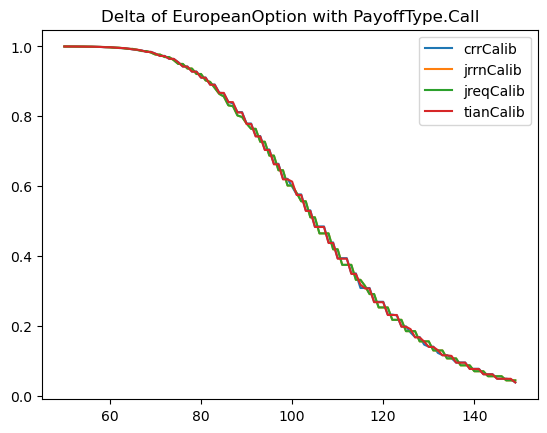

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
greekTyp = 'Delta'
PayoffType = PayoffType.Call
OptionType = EuropeanOption
Delta_EuropeanCall = pd.DataFrame()
for n,model in enumerate (model_list):
    list =[]
    for strike in strike_range:
        Price = binomialGreeks(S,r,vol,T,strike,greekTyp,PayoffType,OptionType,model)
        list.append(Price)
    Delta_EuropeanCall[f'{n}'] = list
Delta_EuropeanCall.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_EuropeanCall.index = strike_range
Delta_EuropeanCall.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Delta of EuropeanOption with PayoffType.Put')

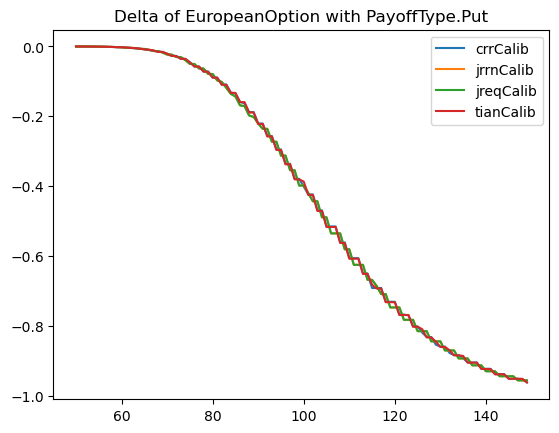

In [8]:
greekTyp = 'Delta'
PayoffType = PayoffType.Put
OptionType = EuropeanOption
Delta_EuropeanPut = pd.DataFrame()
for n, model in enumerate(model_list):
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_EuropeanPut[f'{n}'] = list
Delta_EuropeanPut.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_EuropeanPut.index = strike_range
Delta_EuropeanPut.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Delta of AmericanOption with PayoffType.Call')

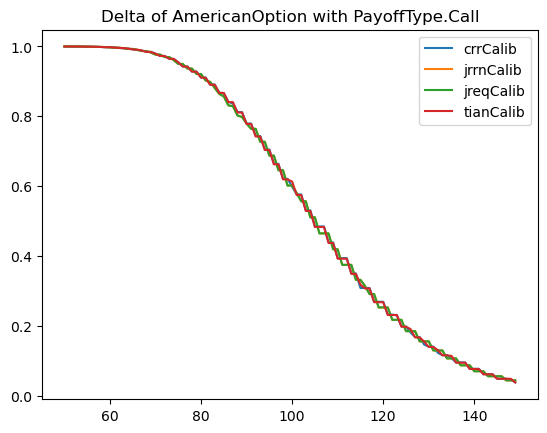

In [9]:
greekTyp = 'Delta'
PayoffType = PayoffType.Call
OptionType = AmericanOption
Delta_AmericanCall = pd.DataFrame()
for n, model in enumerate(model_list): 
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_AmericanCall[f'{n}'] = list
Delta_AmericanCall.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_AmericanCall.index = strike_range
Delta_AmericanCall.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Delta of AmericanOption with PayoffType.Put')

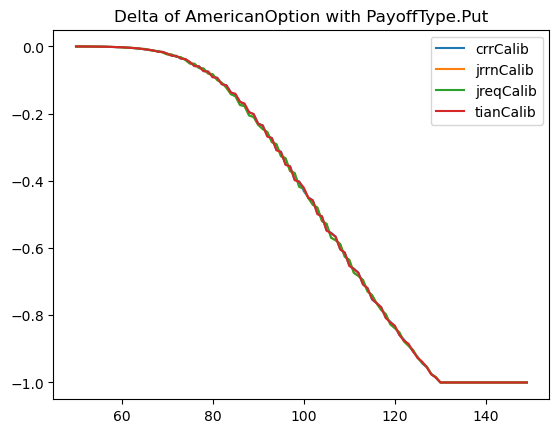

In [10]:
greekTyp = 'Delta'
PayoffType = PayoffType.Put
OptionType = AmericanOption
Delta_AmericanPut = pd.DataFrame()
for n, model in enumerate(model_list):
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_AmericanPut[f'{n}'] = list
Delta_AmericanPut.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_AmericanPut.index = strike_range
Delta_AmericanPut.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

### Gamma

Text(0.5, 1.0, 'Gamma of EuropeanOption with PayoffType.Call')

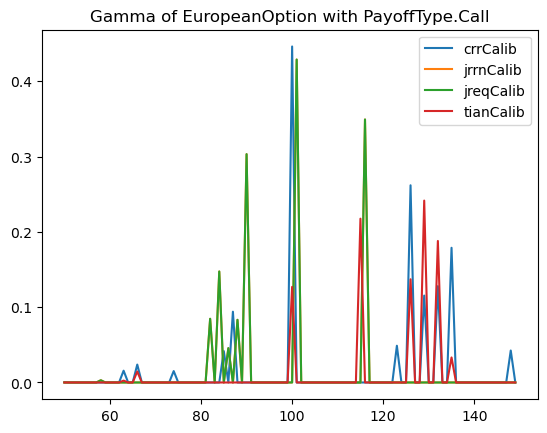

In [11]:
greekTyp = 'Gamma'
PayoffType = PayoffType.Call
OptionType = EuropeanOption
Delta_EuropeanCall = pd.DataFrame()
for n,model in enumerate (model_list):
    list =[]
    for strike in strike_range:
        Price = binomialGreeks(S,r,vol,T,strike,greekTyp,PayoffType,OptionType,model)
        list.append(Price)
    Delta_EuropeanCall[f'{n}'] = list
Delta_EuropeanCall.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_EuropeanCall.index = strike_range
Delta_EuropeanCall.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Gamma of EuropeanOption with PayoffType.Put')

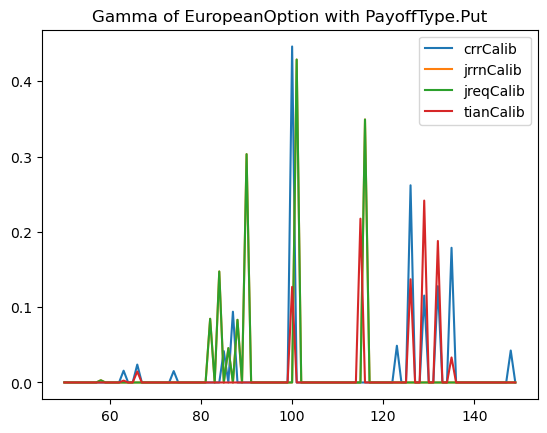

In [12]:
greekTyp = 'Gamma'
PayoffType = PayoffType.Put
OptionType = EuropeanOption
Delta_EuropeanPut = pd.DataFrame()
for n, model in enumerate(model_list):
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_EuropeanPut[f'{n}'] = list
Delta_EuropeanPut.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_EuropeanPut.index = strike_range
Delta_EuropeanPut.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Gamma of AmericanOption with PayoffType.Call')

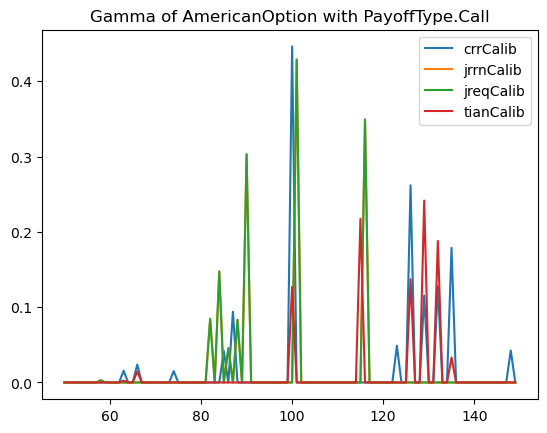

In [13]:
greekTyp = 'Gamma'
PayoffType = PayoffType.Call
OptionType = AmericanOption
Delta_AmericanCall = pd.DataFrame()
for n, model in enumerate(model_list): 
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_AmericanCall[f'{n}'] = list
Delta_AmericanCall.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_AmericanCall.index = strike_range
Delta_AmericanCall.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Gamma of AmericanOption with PayoffType.Put')

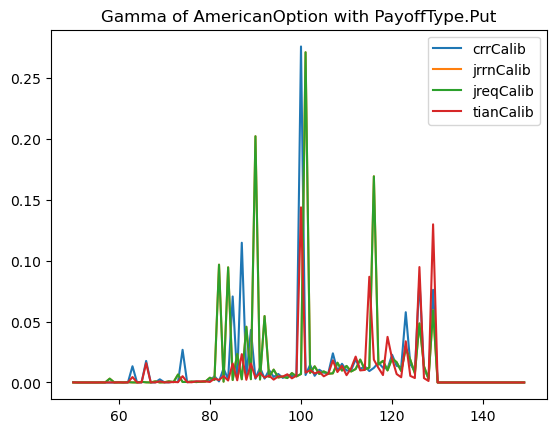

In [14]:
greekTyp = 'Gamma'
PayoffType = PayoffType.Put
OptionType = AmericanOption
Delta_AmericanPut = pd.DataFrame()
for n, model in enumerate(model_list):
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_AmericanPut[f'{n}'] = list
Delta_AmericanPut.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_AmericanPut.index = strike_range
Delta_AmericanPut.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

### Vega

Text(0.5, 1.0, 'Vega of EuropeanOption with PayoffType.Call')

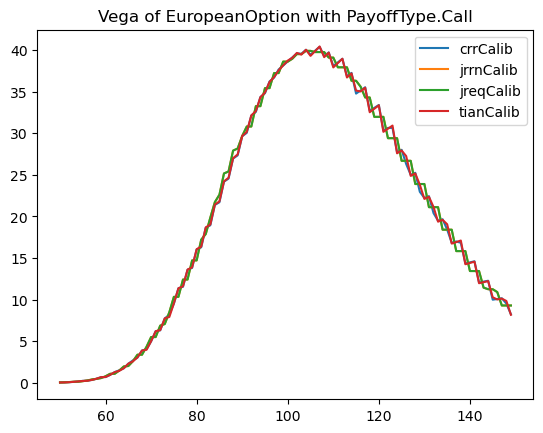

In [15]:
greekTyp = 'Vega'
PayoffType = PayoffType.Call
OptionType = EuropeanOption
Delta_EuropeanCall = pd.DataFrame()
for n,model in enumerate (model_list):
    list =[]
    for strike in strike_range:
        Price = binomialGreeks(S,r,vol,T,strike,greekTyp,PayoffType,OptionType,model)
        list.append(Price)
    Delta_EuropeanCall[f'{n}'] = list
Delta_EuropeanCall.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_EuropeanCall.index = strike_range
Delta_EuropeanCall.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Vega of EuropeanOption with PayoffType.Put')

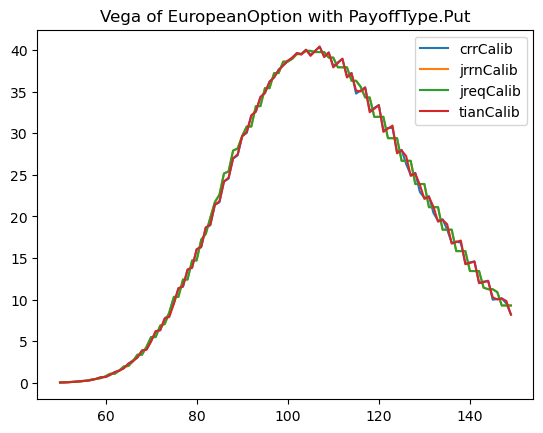

In [16]:
greekTyp = 'Vega'
PayoffType = PayoffType.Put
OptionType = EuropeanOption
Delta_EuropeanPut = pd.DataFrame()
for n, model in enumerate(model_list):
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_EuropeanPut[f'{n}'] = list
Delta_EuropeanPut.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_EuropeanPut.index = strike_range
Delta_EuropeanPut.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Vega of AmericanOption with PayoffType.Call')

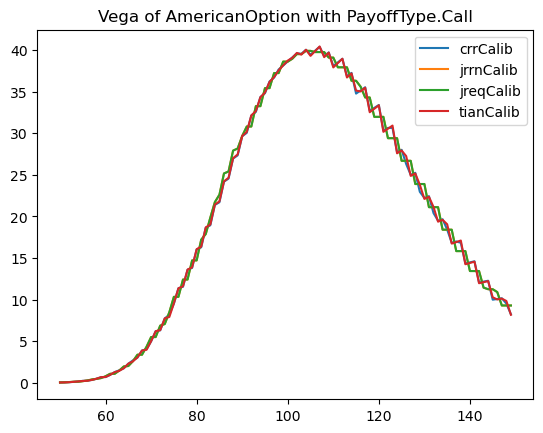

In [17]:
greekTyp = 'Vega'
PayoffType = PayoffType.Call
OptionType = AmericanOption
Delta_AmericanCall = pd.DataFrame()
for n, model in enumerate(model_list): 
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_AmericanCall[f'{n}'] = list
Delta_AmericanCall.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_AmericanCall.index = strike_range
Delta_AmericanCall.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Vega of AmericanOption with PayoffType.Put')

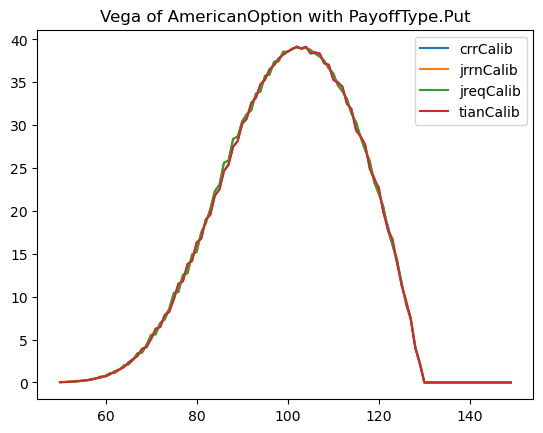

In [18]:
greekTyp = 'Vega'
PayoffType = PayoffType.Put
OptionType = AmericanOption
Delta_AmericanPut = pd.DataFrame()
for n, model in enumerate(model_list):
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_AmericanPut[f'{n}'] = list
Delta_AmericanPut.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_AmericanPut.index = strike_range
Delta_AmericanPut.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

### Theta

Text(0.5, 1.0, 'Theta of EuropeanOption with PayoffType.Call')

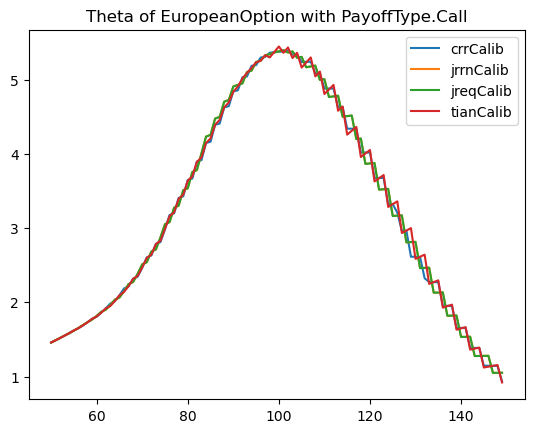

In [19]:
greekTyp = 'Theta'
PayoffType = PayoffType.Call
OptionType = EuropeanOption
Delta_EuropeanCall = pd.DataFrame()
for n,model in enumerate (model_list):
    list =[]
    for strike in strike_range:
        Price = binomialGreeks(S,r,vol,T,strike,greekTyp,PayoffType,OptionType,model)
        list.append(Price)
    Delta_EuropeanCall[f'{n}'] = list
Delta_EuropeanCall.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_EuropeanCall.index = strike_range
Delta_EuropeanCall.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Theta of EuropeanOption with PayoffType.Put')

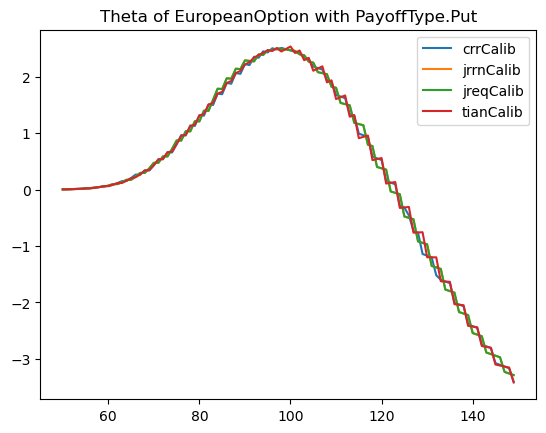

In [20]:
greekTyp = 'Theta'
PayoffType = PayoffType.Put
OptionType = EuropeanOption
Delta_EuropeanPut = pd.DataFrame()
for n, model in enumerate(model_list):
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_EuropeanPut[f'{n}'] = list
Delta_EuropeanPut.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_EuropeanPut.index = strike_range
Delta_EuropeanPut.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Theta of AmericanOption with PayoffType.Call')

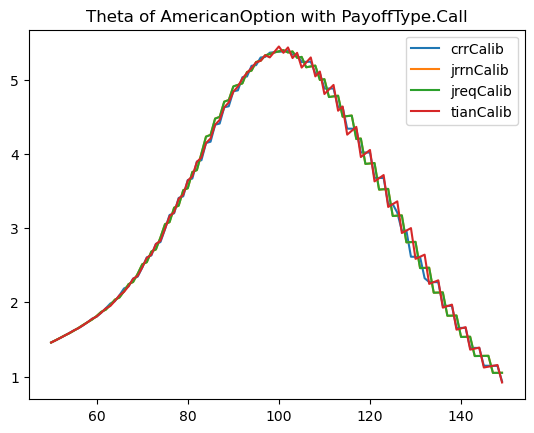

In [21]:
greekTyp = 'Theta'
PayoffType = PayoffType.Call
OptionType = AmericanOption
Delta_AmericanCall = pd.DataFrame()
for n, model in enumerate(model_list): 
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_AmericanCall[f'{n}'] = list
Delta_AmericanCall.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_AmericanCall.index = strike_range
Delta_AmericanCall.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Theta of AmericanOption with PayoffType.Put')

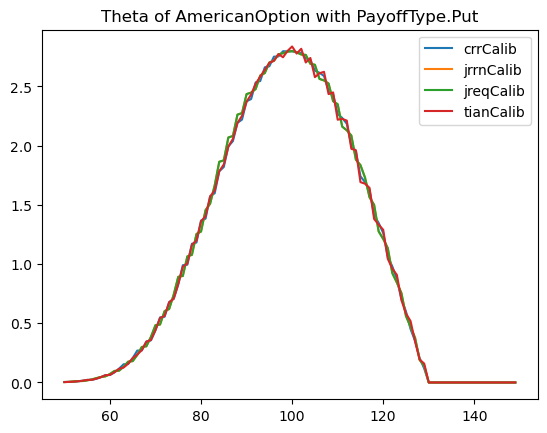

In [22]:
greekTyp = 'Theta'
PayoffType = PayoffType.Put
OptionType = AmericanOption
Delta_AmericanPut = pd.DataFrame()
for n, model in enumerate(model_list):
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_AmericanPut[f'{n}'] = list
Delta_AmericanPut.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_AmericanPut.index = strike_range
Delta_AmericanPut.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

### Rho

Text(0.5, 1.0, 'Rho of EuropeanOption with PayoffType.Call')

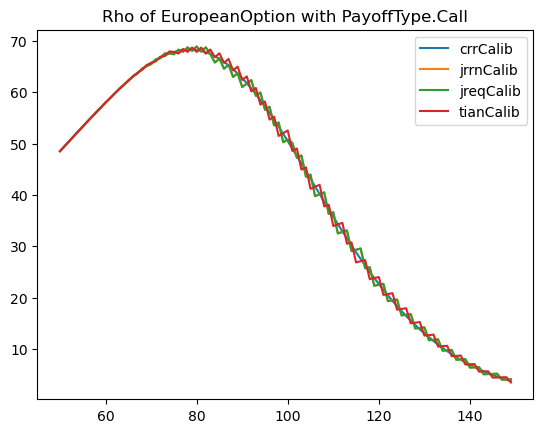

In [23]:
greekTyp = 'Rho'
PayoffType = PayoffType.Call
OptionType = EuropeanOption
Delta_EuropeanCall = pd.DataFrame()
for n,model in enumerate (model_list):
    list =[]
    for strike in strike_range:
        Price = binomialGreeks(S,r,vol,T,strike,greekTyp,PayoffType,OptionType,model)
        list.append(Price)
    Delta_EuropeanCall[f'{n}'] = list
Delta_EuropeanCall.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_EuropeanCall.index = strike_range
Delta_EuropeanCall.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Rho of EuropeanOption with PayoffType.Put')

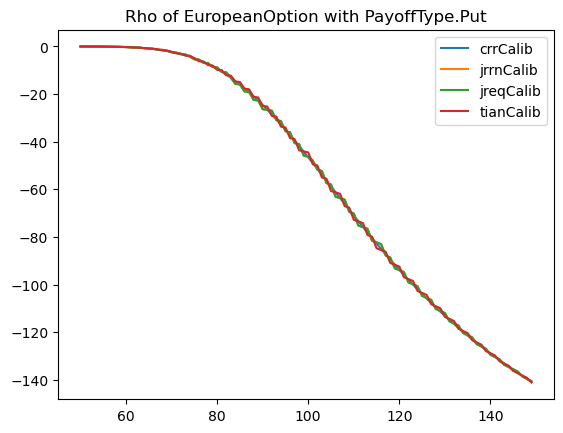

In [24]:
greekTyp = 'Rho'
PayoffType = PayoffType.Put
OptionType = EuropeanOption
Delta_EuropeanPut = pd.DataFrame()
for n, model in enumerate(model_list):
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_EuropeanPut[f'{n}'] = list
Delta_EuropeanPut.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_EuropeanPut.index = strike_range
Delta_EuropeanPut.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Rho of AmericanOption with PayoffType.Call')

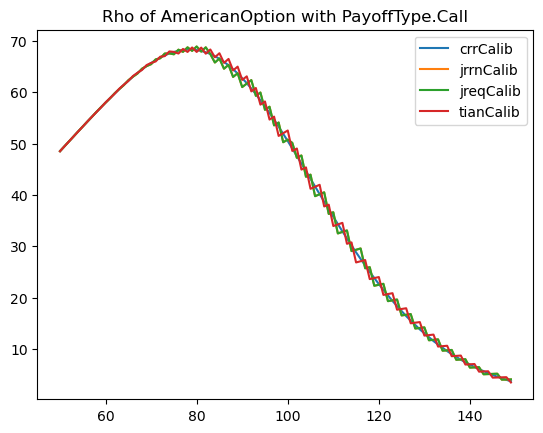

In [25]:
greekTyp = 'Rho'
PayoffType = PayoffType.Call
OptionType = AmericanOption
Delta_AmericanCall = pd.DataFrame()
for n, model in enumerate(model_list): 
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_AmericanCall[f'{n}'] = list
Delta_AmericanCall.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_AmericanCall.index = strike_range
Delta_AmericanCall.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')

Text(0.5, 1.0, 'Rho of AmericanOption with PayoffType.Put')

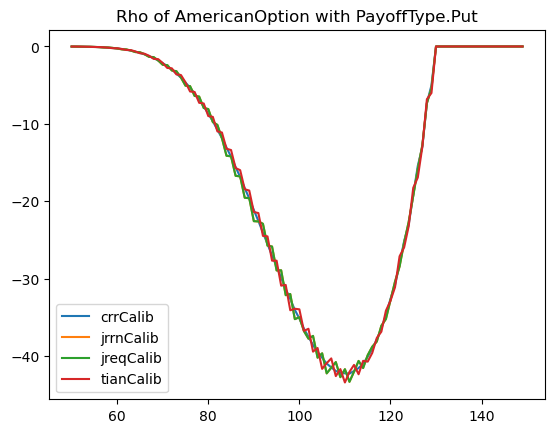

In [26]:
greekTyp = 'Rho'
PayoffType = PayoffType.Put
OptionType = AmericanOption
Delta_AmericanPut = pd.DataFrame()
for n, model in enumerate(model_list):
    list = []
    for strike in strike_range:
        Price = binomialGreeks(S, r, vol, T, strike, greekTyp, PayoffType, OptionType, model)
        list.append(Price)
    Delta_AmericanPut[f'{n}'] = list
Delta_AmericanPut.columns = ['crrCalib', 'jrrnCalib', 'jreqCalib', 'tianCalib']
Delta_AmericanPut.index = strike_range
Delta_AmericanPut.plot()
plt.title(f'{greekTyp} of {OptionType.__name__} with {PayoffType}')